In [1]:
!pip install mlrose_hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.0 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=a85d82c2ba8eee199f78ef21b7c25fe4ae729a9b4a06bd928dfa5091fe7c8afb
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [2]:
import mlrose_hiive
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
np.random.seed(45)

In [11]:
problem_sizes = range(20,120,20)
max_iters = 3000

In [27]:
def solve_problem(fitness, problem_name):
  fitness_random_hill_climb = []
  fitness_simulated_annealing = []
  fitness_genetic_alg = []
  fitness_mimic = []

  time_random_hill_climb = []
  time_simulated_annealing = []
  time_genetic_alg = []
  time_mimic = []
  fitness_curve_simulated_annealing_for_plot = []
  fitness_curve_random_hill_climb_for_plot = []
  fitness_curve_genetic_alg_for_plot = []
  fitness_curve_mimic_for_plot = []
  for problem_size in problem_sizes:
    problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.randint(2, size = problem_size)

    start = time.time()
    best_state_simulated_annealing, best_fitness_simulated_annealing, fitness_curve_simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 100, max_iters = max_iters, init_state = init_state, curve = True)
    end = time.time()
    simulated_annealing_time = end - start
    fitness_curve_simulated_annealing_for_plot = fitness_curve_simulated_annealing

    start = time.time()
    best_state_randon_hill_climb, best_fitness_randon_hill_climb, fitness_curve_random_hill_climb = mlrose_hiive.random_hill_climb(problem, max_attempts = 100, max_iters = max_iters, init_state = init_state, curve = True)
    end = time.time()
    randon_hill_climb_time = end - start
    fitness_curve_random_hill_climb_for_plot = fitness_curve_random_hill_climb


    start = time.time()
    best_state_generic_alg, best_fitness_generic_alg, fitness_curve_genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size = problem_size, max_attempts = 100, max_iters = max_iters, curve = True)
    end = time.time()
    generic_alg_time = end - start
    fitness_curve_genetic_alg_for_plot = fitness_curve_genetic_alg


    start = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, keep_pct=0.2, max_attempts = 100, max_iters = max_iters, curve = True)
    end = time.time()
    mimic_time = end - start
    fitness_curve_mimic_for_plot = fitness_curve_mimic

    fitness_simulated_annealing.append(best_fitness_simulated_annealing)
    fitness_random_hill_climb.append(best_fitness_randon_hill_climb)
    fitness_genetic_alg.append(best_fitness_generic_alg)
    fitness_mimic.append(best_fitness_mimic)

    time_simulated_annealing.append(simulated_annealing_time)
    time_random_hill_climb.append(randon_hill_climb_time)
    time_genetic_alg.append(generic_alg_time)
    time_mimic.append(mimic_time)

  fitness_simulated_annealing = np.array(fitness_simulated_annealing)
  fitness_random_hill_climb = np.array(fitness_random_hill_climb)
  fitness_genetic_alg = np.array(fitness_genetic_alg)
  fitness_mimic = np.array(fitness_mimic)

  time_simulated_annealing = np.array(time_simulated_annealing)
  time_random_hill_climb = np.array(time_random_hill_climb)
  time_genetic_alg = np.array(time_genetic_alg)
  time_mimic = np.array(time_mimic)

  plt.figure()
  plt.plot(problem_sizes, fitness_simulated_annealing, label = 'Simulated Annealing')
  plt.plot(problem_sizes, fitness_random_hill_climb, label = 'Randomized Hill Climb')
  plt.plot(problem_sizes, fitness_genetic_alg, label = 'Genetic Algorithm')
  plt.plot(problem_sizes, fitness_mimic, label = 'MIMIC')
  plt.title('Fitness against Problem Size ('+problem_name+')')
  plt.xlabel('Problem Size')
  plt.ylabel('Fitness')
  plt.legend()

  plt.figure()
  plt.plot(problem_sizes, time_simulated_annealing, label = 'Simulated Annealing')
  plt.plot(problem_sizes, time_random_hill_climb, label = 'Randomized Hill Climb')
  plt.plot(problem_sizes, time_genetic_alg, label = 'Genetic Algorithm')
  plt.plot(problem_sizes, time_mimic, label = 'MIMIC')
  plt.title('Time Efficiency against Problem Size ('+problem_name+')')
  plt.xlabel('Problem Size')
  plt.ylabel('Computation Time (s)')
  plt.legend()
  plt.figure()
  plt.plot(fitness_curve_simulated_annealing_for_plot[:,0], label = 'Simulated Annealing')
  plt.plot(fitness_curve_random_hill_climb_for_plot[:,0], label = 'Randomized Hill Climb')
  plt.plot(fitness_curve_genetic_alg_for_plot[:,0], label = 'Genetic Algorithm')
  plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
  plt.title('Fitness Curve ('+problem_name+')')
  plt.xlabel('Iterations')
  plt.ylabel('Fitness')
  plt.legend()

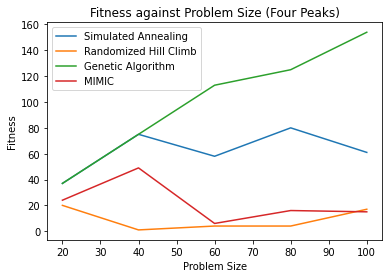

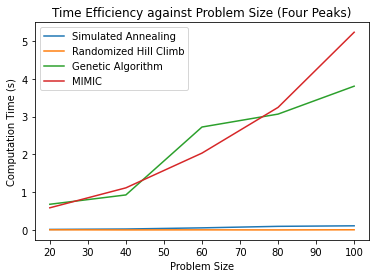

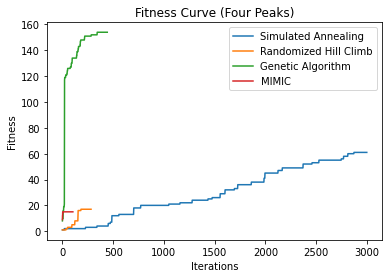

In [28]:
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
solve_problem(fitness, "Four Peaks")


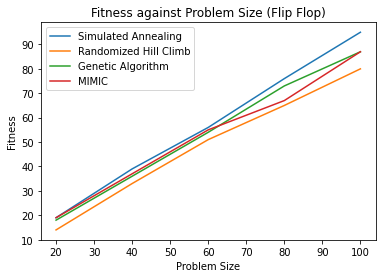

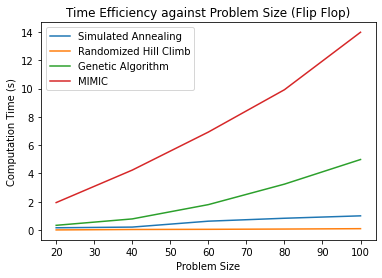

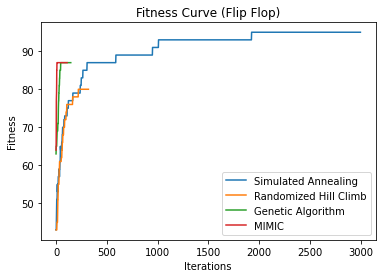

In [6]:
fitness= mlrose_hiive.FlipFlop()
solve_problem(fitness, "Flip Flop")


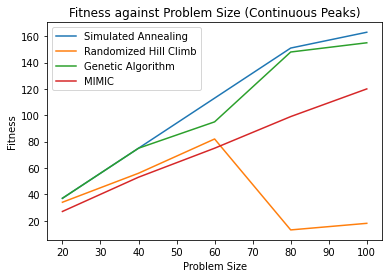

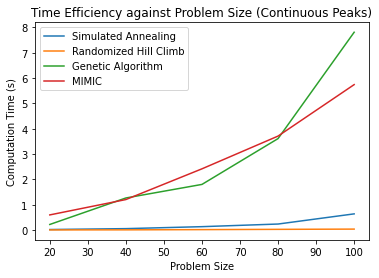

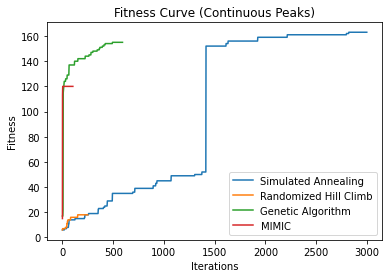

In [47]:
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
solve_problem(fitness, "Continuous Peaks")

In [7]:
#Test with larger problem size
problem_sizes = range(100,600,100)
max_iters = 3000

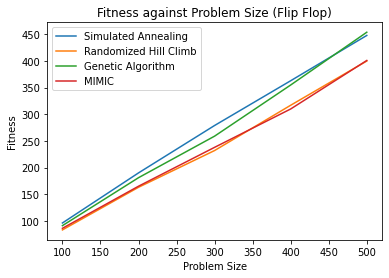

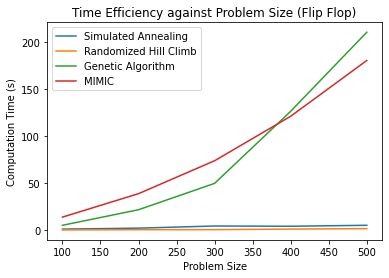

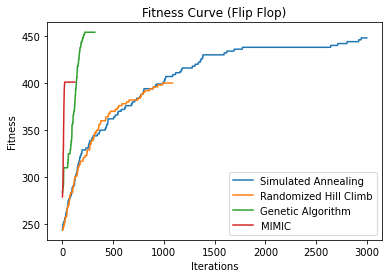

In [8]:
#Test with larger problem size
fitness= mlrose_hiive.FlipFlop()
solve_problem(fitness, "Flip Flop")

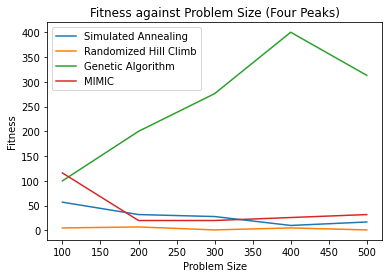

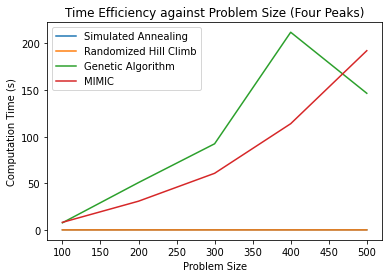

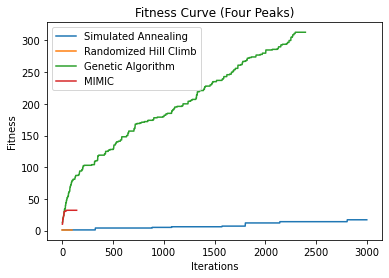

In [9]:
#Test with larger problem size
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
solve_problem(fitness, "Four Peaks")

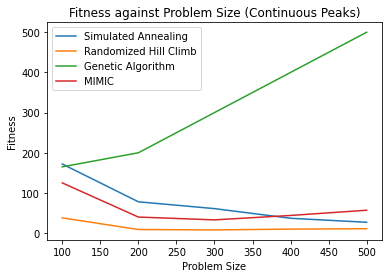

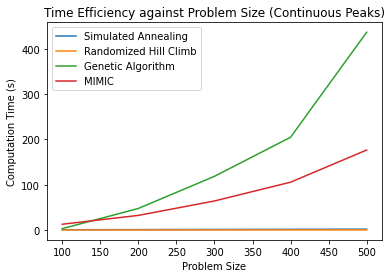

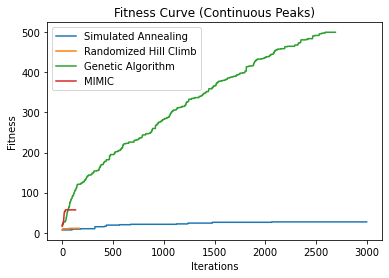

In [10]:
#Test with larger problem size
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
solve_problem(fitness, "Continuous Peaks")